In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [2]:
Pkg.add(["CairoMakie","LinearAlgebra","Distributions","Convex","SCS"])

    Updating registry at `~/.julia/registries/General.toml`
    Updating registry at `~/.julia/registries/JuliaComputingRegistry.toml`
    Updating registry at `~/.julia/registries/JuliaHubRegistry.toml`
   Resolving package versions...
   Installed MakieCore ───────────── v0.8.9
   Installed libsixel_jll ────────── v1.10.3+1
   Installed CairoMakie ──────────── v0.12.13
   Installed IntervalArithmetic ──── v0.22.17
   Installed Makie ───────────────── v0.21.13
   Installed DelaunayTriangulation ─ v1.6.0
    Updating `~/Documents/programming/BME-574-2024/Project.toml`
  [13f3f980] + CairoMakie v0.12.13
    Updating `~/Documents/programming/BME-574-2024/Manifest.toml`
  [35492f91] + AdaptivePredicates v1.2.0
  [27a7e980] + Animations v0.4.1
  [67c07d97] + Automa v1.0.4
  [13072b0f] + AxisAlgorithms v1.1.0
  [39de3d68] + AxisArrays v0.4.7
  [159f3aea] + Cairo v1.1.0
  [13f3f980] + CairoMakie v0.12.13
  [a2cac450] + ColorBrewer v0.4.0
  [927a84f5] + DelaunayTriangulation v1.6.0
  [429591f

In [3]:
using CairoMakie, LinearAlgebra, Statistics, Distributions, Convex, SCS

In [4]:
nd = Normal(0,1)

Normal{Float64}(μ=0.0, σ=1.0)

In [5]:
n = 500
m = 100
A = rand(nd, n, m)

500×100 Matrix{Float64}:
 -1.7768     -0.916674   -1.56065   …   1.85783     1.03718     1.26614
 -0.418335   -1.77088     1.60348       0.889281   -0.983938    0.0798501
  1.54736    -0.889734   -0.840888     -1.19299     0.539316    0.610806
  0.476075   -1.51132    -1.70418       0.058684    0.405504    1.57563
 -0.894372    0.864563   -0.338115     -1.26206     0.432494    1.30236
 -1.65729    -0.211004   -0.642916  …   1.19735    -1.57987    -0.0540779
 -0.782635   -0.296791   -0.634156      0.0253097   0.316654    0.178568
 -0.369312   -0.212232   -0.765681      1.56217     0.215668    1.78981
  1.72314    -0.504902   -0.118534     -1.61856    -0.560413    2.05117
 -0.374953    0.716341    1.68194       0.328196   -0.809337   -0.900169
  0.711003   -1.4682     -0.728861  …   0.33621    -0.297035    1.75355
  0.928789    0.445638    1.08981       1.83621    -0.683323    0.778851
 -0.0881439  -0.179552    0.580606     -0.844335   -0.271155    0.531296
  ⋮                           

In [6]:
b = rand(nd, n)

500-element Vector{Float64}:
  0.6742636173552649
  0.0070219974221207284
  0.2078165653068173
  1.0067428027480312
  1.1825426636573362
 -1.7390499199848528
 -0.4103879067028209
 -0.46479029697199975
 -0.22015599472000827
  0.10270017173917532
  1.2096379179248231
  0.3839474799188042
 -0.47600707688258315
  ⋮
 -0.6685045669030092
 -2.392525358494933
 -0.4760167897121313
  2.2161668769029195
  0.5135070335737392
  1.3435010069166091
  0.789611928209371
  1.0354082015513029
 -0.23840975514814758
 -0.8389157616869218
 -0.23573574698768207
 -1.0212427675274935

In [7]:
pinv(A)

100×500 Matrix{Float64}:
 -0.00381693    0.000609223   0.00257156   …  -0.00297091   -0.00214328
 -0.000995221  -0.00333724   -0.000443948      0.00197508   -0.000909775
 -0.0017686     0.00276317   -0.00201065       0.00186191   -0.000276049
  0.000622283   0.00253799    0.00186302       0.00172564    0.00147482
 -0.000305108   0.00132912    0.000913797     -0.000988072  -0.00273795
 -0.00303026    0.000163885  -0.0033715    …   0.00179959   -4.10784e-5
  0.00139902    0.00037045    0.00359625      -0.00204273   -0.00266767
  0.000839079  -0.00170383   -0.000432797      0.00223312    0.000321318
 -0.00269644   -0.00201971    0.00119792      -0.0016446    -0.00151988
  0.000973066  -0.000409407   0.00347346      -0.00366477   -0.0014496
 -0.000160228  -0.00253469   -0.000182457  …   0.00138275   -0.00295268
  0.00164781    0.00132553    0.00227893       0.000258816  -0.00422946
 -0.0033174     0.00352669   -0.00615864      -0.00161941   -0.00248839
  ⋮                                  

In [8]:
xdag = pinv(A)*b

100-element Vector{Float64}:
  0.04412089494296484
 -0.12215917158481267
 -0.08025810792534549
  0.10071575439306205
 -0.04298776071705691
 -0.08157316635240949
 -0.05526257975524851
  0.09738896322108065
  0.033244506253560756
 -0.010565044222132761
  0.01904489417376232
  0.026143847097559174
  0.025744273189193444
  ⋮
 -0.028525140331436254
 -0.01090717717286714
  0.039901012557237235
 -0.06817322307287678
 -0.10315853193475076
  0.10354802706707165
  0.019729260676896534
  0.0923375749948429
 -0.06390190416095363
 -0.00040124766298355036
 -0.01887892211651592
 -0.07886794244159145

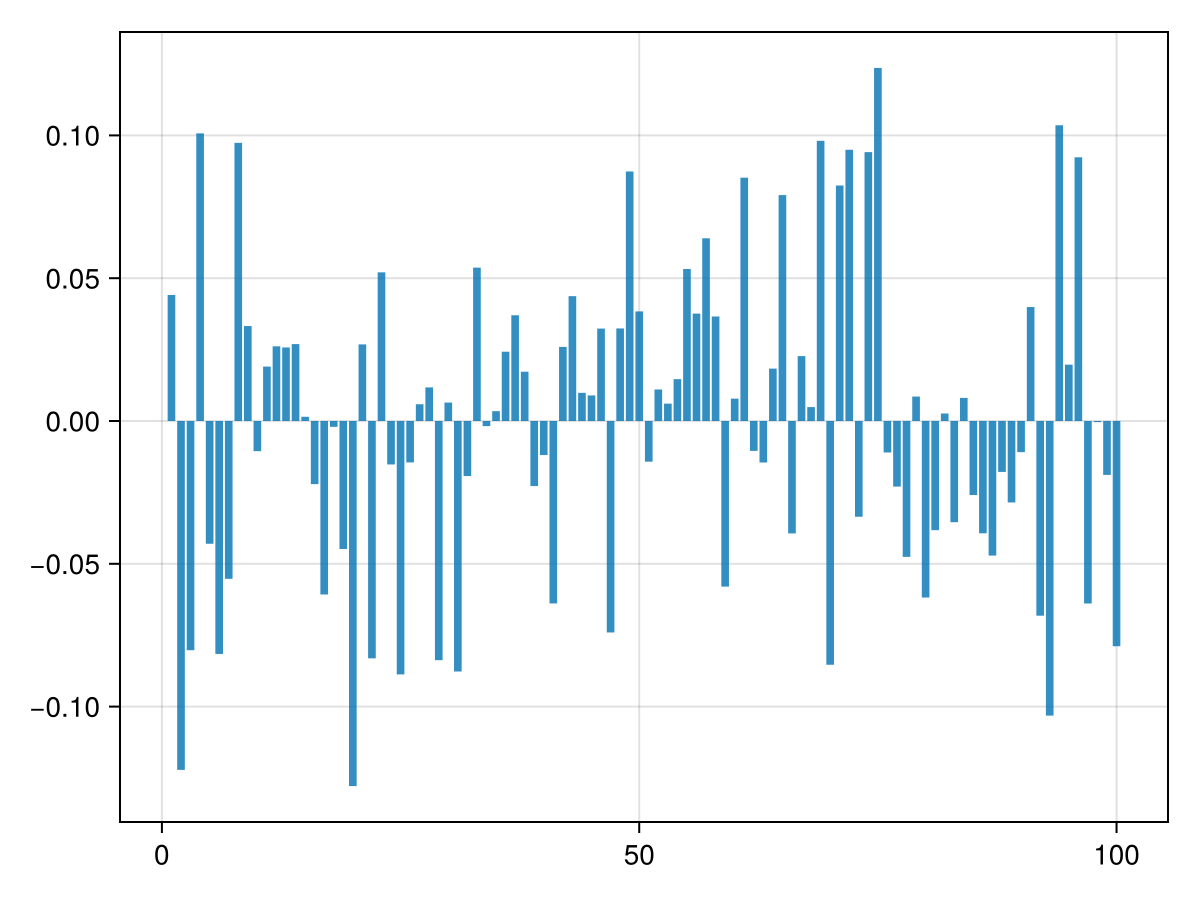

In [10]:
barplot(xdag)

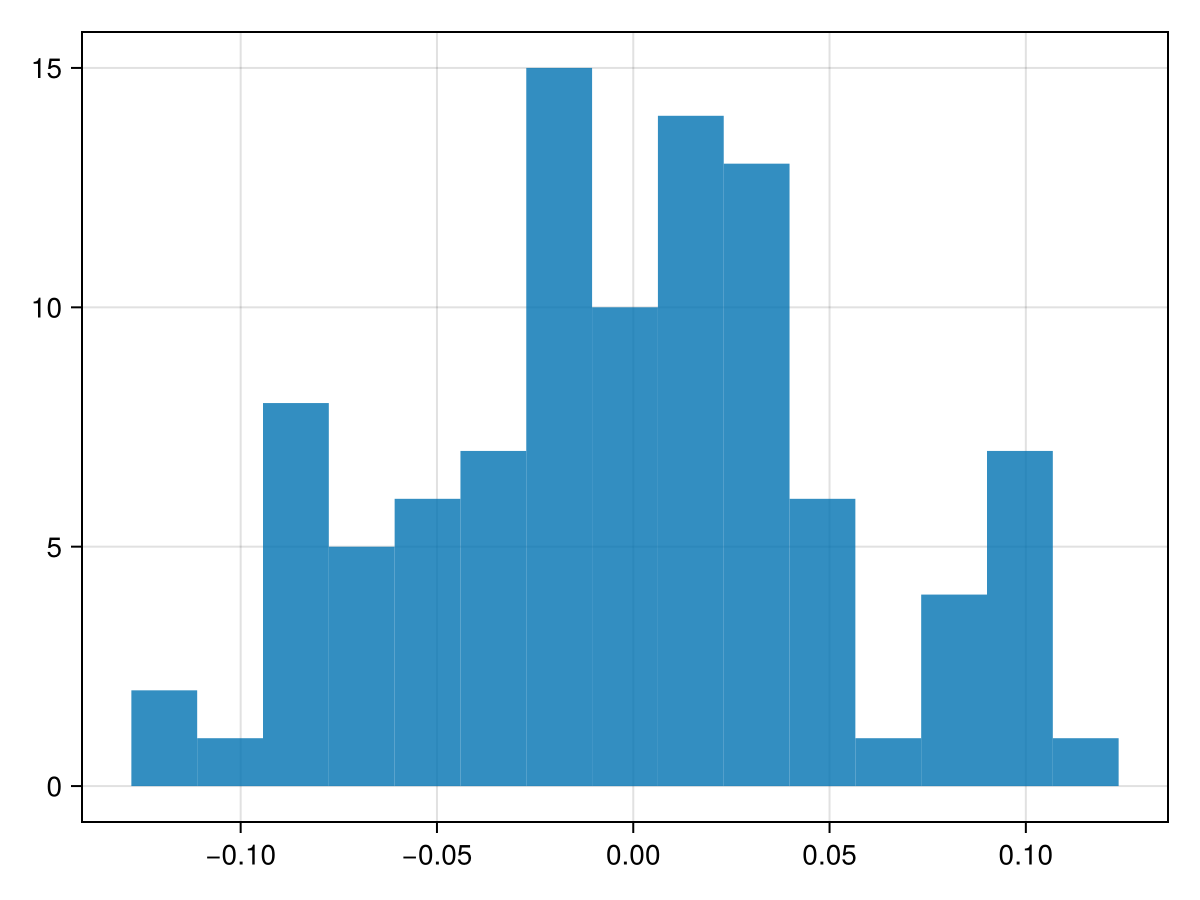

In [12]:
hist(xdag)

In [13]:
# using Convex to perform a Lasso regression
x = Variable(m)

Variable
size: (100, 1)
sign: real
vexity: affine
id: 168…339

In [15]:
problem01 = minimize(norm(A*x-b,2) + 0.1*norm(x,1))

Problem statistics
  problem is DCP         : true
  number of variables    : 1 (100 scalar elements)
  number of constraints  : 0 (0 scalar elements)
  number of coefficients : 50_501
  number of atoms        : 7

Solution summary
  termination status : OPTIMIZE_NOT_CALLED
  primal status      : NO_SOLUTION
  dual status        : NO_SOLUTION

Expression graph
  minimize
   └─ + (convex; positive)
      ├─ norm2 (convex; positive)
      │  └─ + (affine; real)
      │     ├─ …
      │     └─ …
      └─ * (convex; positive)
         ├─ [0.1;;]
         └─ sum (convex; positive)
            └─ …


In [17]:
solve!(problem01, SCS.Optimizer)

[ Info: [Convex.jl] Compilation finished: 1.99 seconds, 609.050 MiB of memory allocated


------------------------------------------------------------------
	       SCS v3.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 201, constraints m: 701
cones: 	  l: linear vars: 200
	  q: soc vars: 501, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
	  compiled with openmp parallelization enabled
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 50401, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 2.69e+02  1.00e+00  2.88e+02 -1.37e+02  1.00e-01  7.39e-03 
   100| 1.95e-03  4.97e-05  1.04e-04  2.09e+01  1.00e-01  1.

Problem statistics
  problem is DCP         : true
  number of variables    : 1 (100 scalar elements)
  number of constraints  : 0 (0 scalar elements)
  number of coefficients : 50_501
  number of atoms        : 7

Solution summary
  termination status : OPTIMAL
  primal status      : FEASIBLE_POINT
  dual status        : FEASIBLE_POINT
  objective value    : 20.8688

Expression graph
  minimize
   └─ + (convex; positive)
      ├─ norm2 (convex; positive)
      │  └─ + (affine; real)
      │     ├─ …
      │     └─ …
      └─ * (convex; positive)
         ├─ [0.1;;]
         └─ sum (convex; positive)
            └─ …


In [18]:
x01 = vec(evaluate(x))

100-element Vector{Float64}:
  0.03479431062472455
 -0.11358623108447863
 -0.06819159976770695
  0.08935086207808486
 -0.03138311660272703
 -0.08423176250873894
 -0.04691673415438946
  0.09296367070913057
  0.022577589580848156
 -0.00780138794437773
  0.012614241811036042
  0.022556400305910843
  0.021615170882081734
  ⋮
 -0.02236165068556167
 -0.004263967120695376
  0.03177631023571968
 -0.06492081013978701
 -0.09316906162508667
  0.09654664573975856
  0.010912527486955726
  0.08360039501196095
 -0.05470806944712935
  0.00013669093588367724
 -0.013852710477343034
 -0.0709496385194809

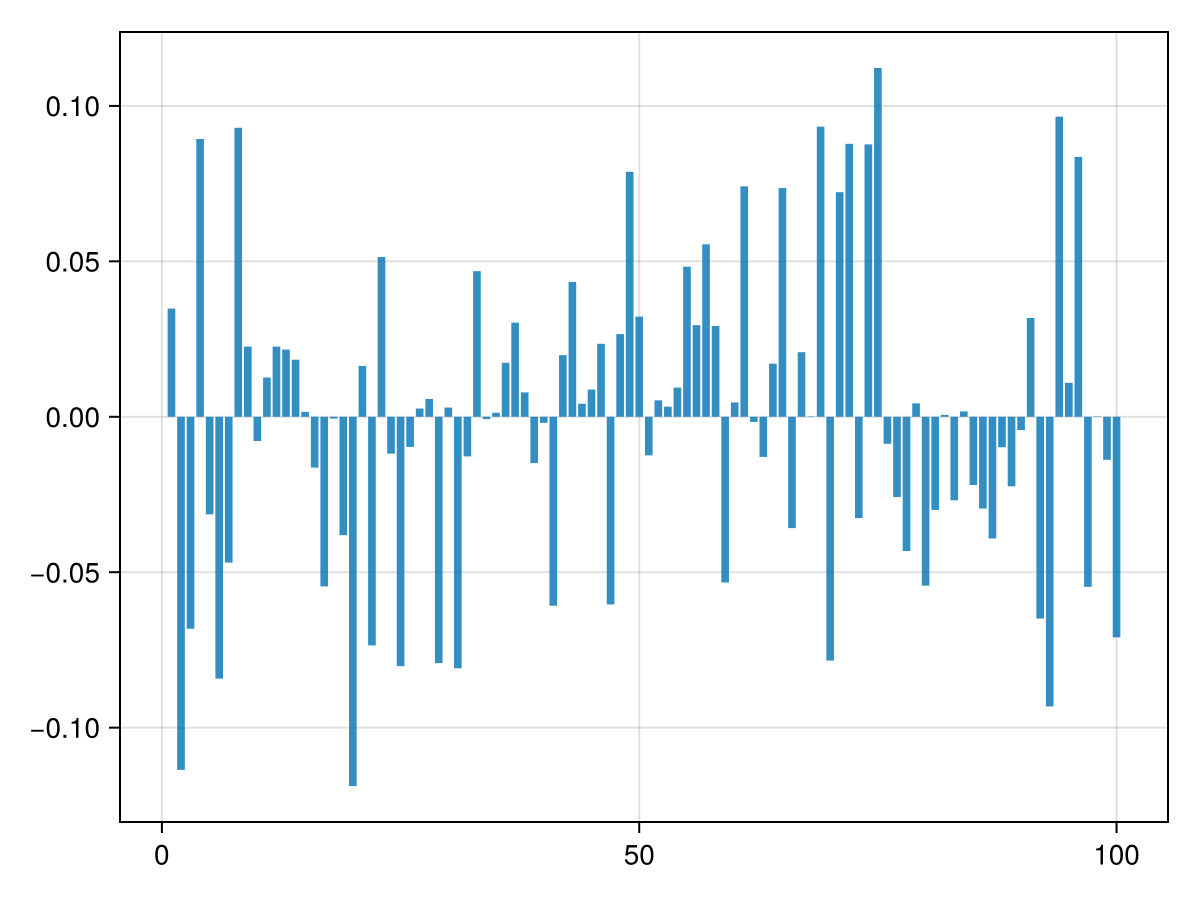

In [19]:
barplot(x01)

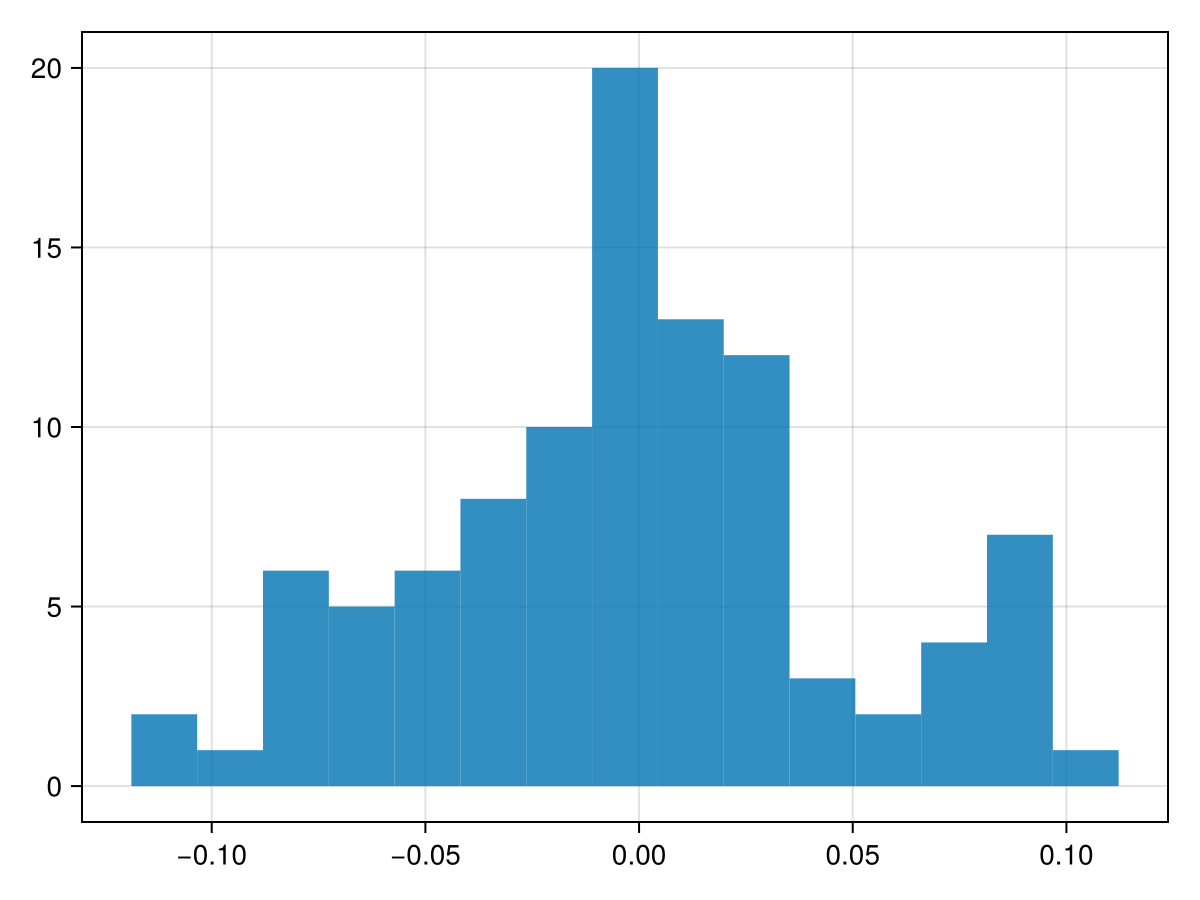

In [21]:
hist(x01)

In [22]:
problem05 = minimize(norm(A*x-b,2) + 0.5*norm(x,1))

Problem statistics
  problem is DCP         : true
  number of variables    : 1 (100 scalar elements)
  number of constraints  : 0 (0 scalar elements)
  number of coefficients : 50_501
  number of atoms        : 7

Solution summary
  termination status : OPTIMIZE_NOT_CALLED
  primal status      : NO_SOLUTION
  dual status        : NO_SOLUTION

Expression graph
  minimize
   └─ + (convex; positive)
      ├─ norm2 (convex; positive)
      │  └─ + (affine; real)
      │     ├─ …
      │     └─ …
      └─ * (convex; positive)
         ├─ [0.5;;]
         └─ sum (convex; positive)
            └─ …


In [23]:
solve!(problem05, SCS.Optimizer; silent=true)

Problem statistics
  problem is DCP         : true
  number of variables    : 1 (100 scalar elements)
  number of constraints  : 0 (0 scalar elements)
  number of coefficients : 50_501
  number of atoms        : 7

Solution summary
  termination status : OPTIMAL
  primal status      : FEASIBLE_POINT
  dual status        : FEASIBLE_POINT
  objective value    : 21.959

Expression graph
  minimize
   └─ + (convex; positive)
      ├─ norm2 (convex; positive)
      │  └─ + (affine; real)
      │     ├─ …
      │     └─ …
      └─ * (convex; positive)
         ├─ [0.5;;]
         └─ sum (convex; positive)
            └─ …


In [24]:
x05 = vec(evaluate(x))

100-element Vector{Float64}:
  0.0002512344636546364
 -0.08661113393435604
 -0.032624612027257534
  0.05425726645975045
 -0.0005853946226162973
 -0.09218152152365881
 -0.023588739013883937
  0.07435044289475998
  0.0002978591175059257
 -0.0004757338870896609
  0.0012621985097351226
  0.009005202398412238
  0.007385887464845955
  ⋮
 -0.0009847845581777994
 -0.00018626949459758256
  0.006454034535090896
 -0.043730440978924714
 -0.059151765065659154
  0.06860420199826399
 -0.00023367887429250552
  0.05249026061090475
 -0.017550172502720375
  0.0004357940842886475
 -0.00036202964368072443
 -0.03728437569785975

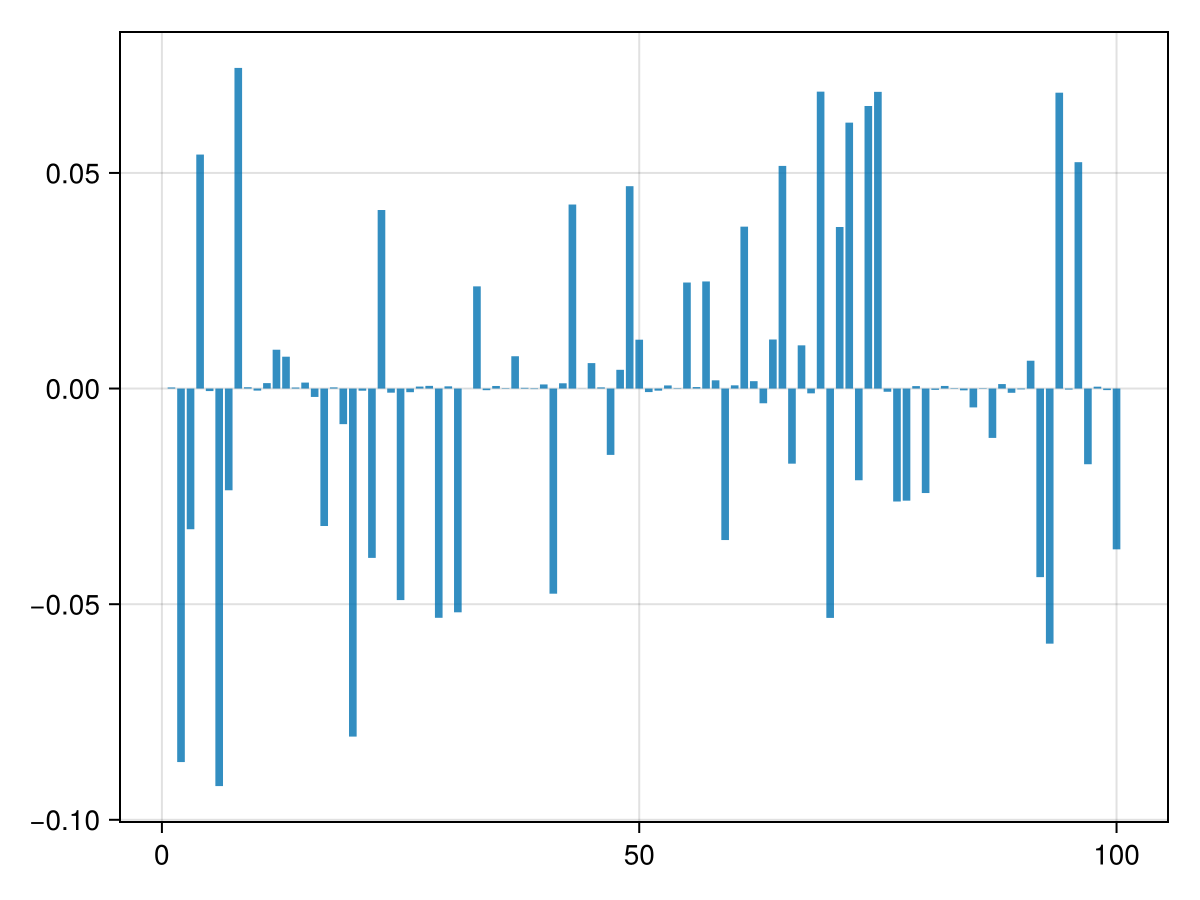

In [25]:
barplot(x05)

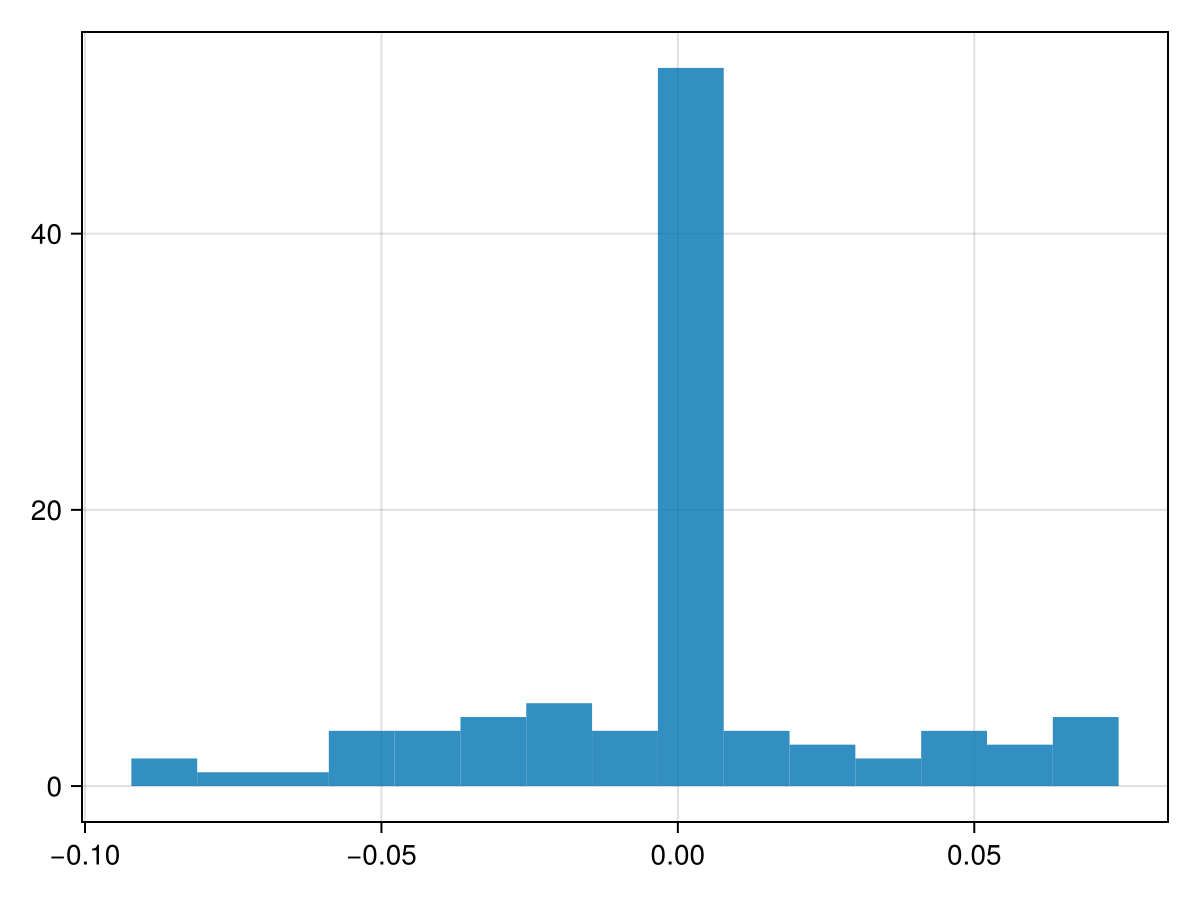

In [26]:
hist(x05)

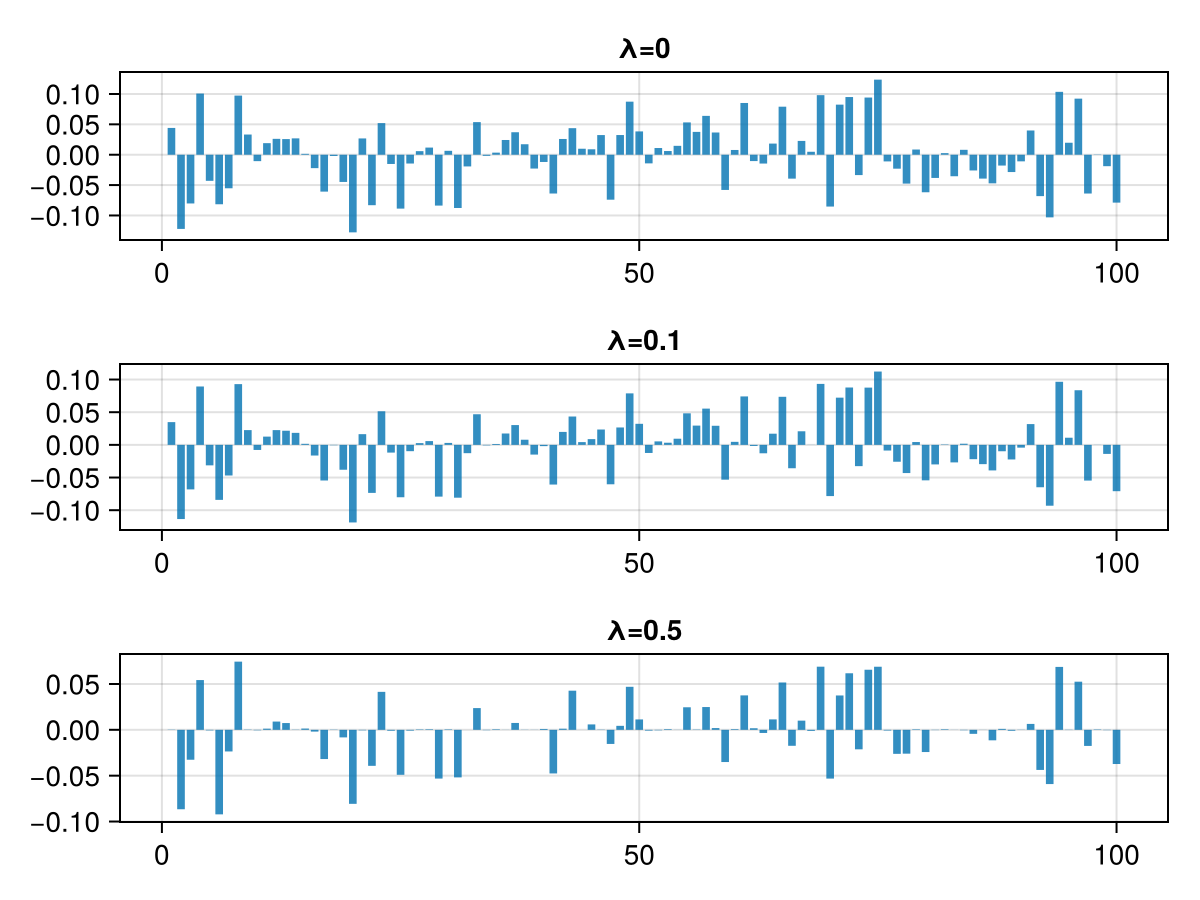

In [33]:
figbar = Figure()
ax1 = Axis(figbar[1,1], title="λ=0")
barplot!(ax1,xdag)
ax2 = Axis(figbar[2,1], title="λ=0.1")
barplot!(ax2,x01)
ax3 = Axis(figbar[3,1], title="λ=0.5")
barplot!(ax3,x05)
figbar

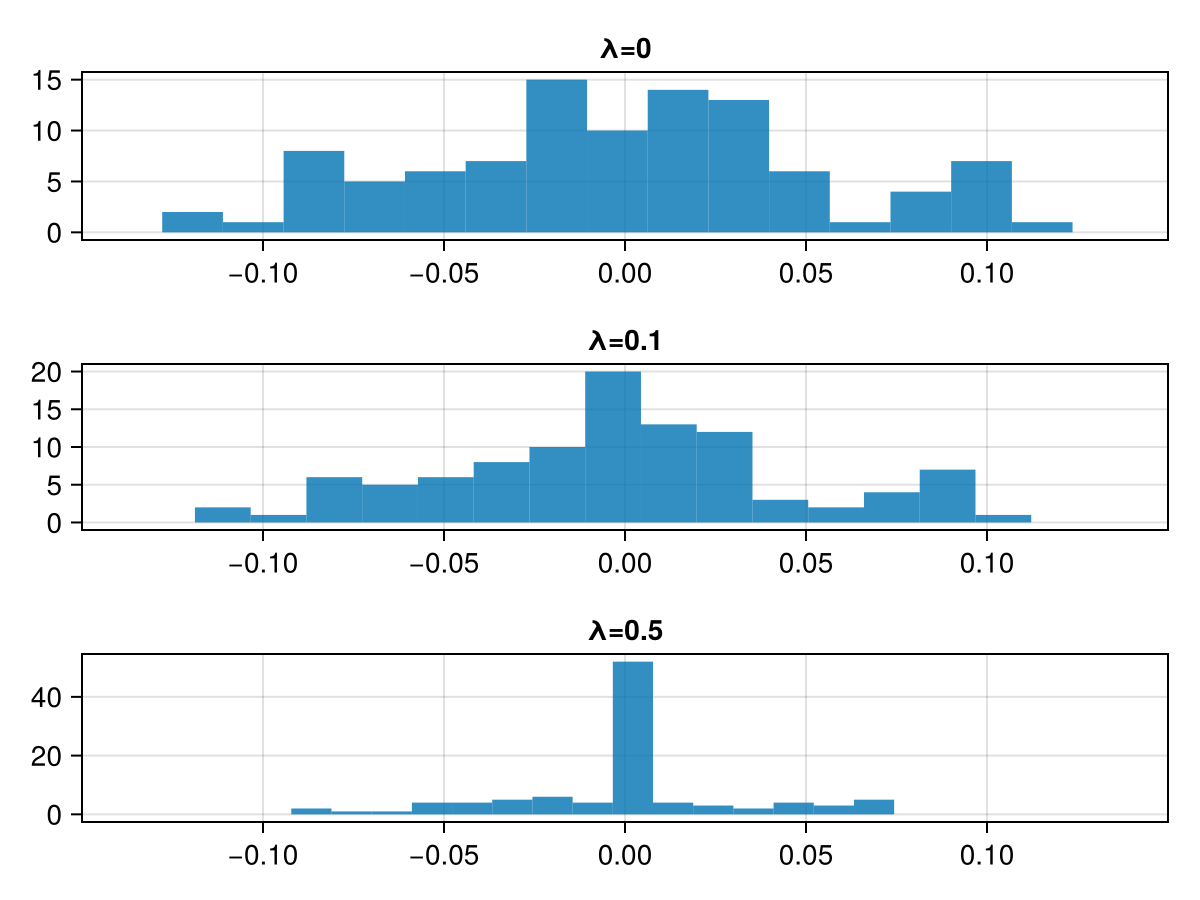

In [32]:
fighist = Figure()
ax1 = Axis(fighist[1,1], title="λ=0")
hist!(ax1,xdag)
ax2 = Axis(fighist[2,1], title="λ=0.1")
hist!(ax2,x01)
ax3 = Axis(fighist[3,1], title="λ=0.5")
hist!(ax3,x05)
xlims!.((ax1, ax2, ax3), -0.15, 0.15)
fighist

In [34]:
# lets move to underdetermined systems
n = 20
m = 100
A = rand(nd, n, m)

20×100 Matrix{Float64}:
  1.70718     0.377664     0.600076   …  -0.292707  -0.302493   -0.038741
  0.841689    1.81793      0.111998      -0.43983    1.49048     0.201716
 -0.486454    1.3215       0.774581       0.20728    0.693216   -0.219714
 -0.192919   -0.31064      0.287521       0.936213  -0.91018    -0.987447
  0.380515   -1.43368      0.104342       0.953626  -0.0573607   0.475156
 -0.519109   -0.00838271  -0.81607    …  -1.12004    0.3801     -0.353249
 -0.112876    0.761652     1.25963       -0.32612    1.42128     0.463067
 -1.10132     1.43482     -0.017227       0.122998   0.396428    1.12632
 -0.38387     0.154955    -0.432366      -0.499841  -0.365288   -0.685489
  0.0926755   1.15912     -0.701563      -0.114542   0.711639    0.837704
  0.220701   -0.155719     0.235658   …  -0.88356    0.688787   -1.04804
  0.541043    1.24355     -0.36142       -0.360311  -1.16108    -0.956847
  0.348624    1.48482     -0.294012      -0.335117  -0.313192    0.216703
 -0.887116    2.

In [35]:
b = rand(nd, n)

20-element Vector{Float64}:
 -0.9936848314406197
 -0.1156062004770294
  0.1810195512038114
  1.1008264367084868
  0.846218221626586
  0.7680413617746928
 -0.8497299948655017
  1.0211222987724342
 -0.29729456119623815
  0.8588290492869529
 -1.9920817403522426
  1.1079479090177011
  0.41609231662462637
  0.5621900879835625
 -1.1568773464931057
  0.41410986997848653
  2.2293941713010055
  2.790281159156014
 -0.1689111195621256
  1.3243668483563265

In [36]:
xx = Variable(m)

Variable
size: (100, 1)
sign: real
vexity: affine
id: 123…065

In [38]:
problem = minimize(norm(xx,2),[A*xx == b])

Problem statistics
  problem is DCP         : true
  number of variables    : 1 (100 scalar elements)
  number of constraints  : 1 (20 scalar elements)
  number of coefficients : 2_020
  number of atoms        : 3

Solution summary
  termination status : OPTIMIZE_NOT_CALLED
  primal status      : NO_SOLUTION
  dual status        : NO_SOLUTION

Expression graph
  minimize
   └─ norm2 (convex; positive)
      └─ 100-element real variable (id: 123…065)
  subject to
   └─ == constraint (affine)
      └─ + (affine; real)
         ├─ * (affine; real)
         │  ├─ …
         │  └─ …
         └─ 20×1 Matrix{Float64}


In [39]:
solve!(problem, SCS.Optimizer)

------------------------------------------------------------------
	       SCS v3.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 101, constraints m: 121
cones: 	  z: primal zero / dual free vars: 20
	  q: soc vars: 101, qsize: 1
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
	  compiled with openmp parallelization enabled
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 2101, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 1.59e+01  1.00e+00  1.60e+01 -7.92e+00  1.00e-01  3.75e-04 
    50| 1.06e-07  3.11e-09  7.88e-09  6.34e-0

[ Info: [Convex.jl] Compilation finished: 0.06 seconds, 5.859 MiB of memory allocated


Problem statistics
  problem is DCP         : true
  number of variables    : 1 (100 scalar elements)
  number of constraints  : 1 (20 scalar elements)
  number of coefficients : 2_020
  number of atoms        : 3

Solution summary
  termination status : OPTIMAL
  primal status      : FEASIBLE_POINT
  dual status        : FEASIBLE_POINT
  objective value    : 0.6345

Expression graph
  minimize
   └─ norm2 (convex; positive)
      └─ 100-element real variable (id: 123…065)
  subject to
   └─ == constraint (affine)
      └─ + (affine; real)
         ├─ * (affine; real)
         │  ├─ …
         │  └─ …
         └─ 20×1 Matrix{Float64}


In [40]:
xx_sol = vec(evaluate(xx))

100-element Vector{Float64}:
 -0.05783030596252852
  0.057189964124752836
 -0.03804430646640031
 -0.023772565700746942
 -0.04645629455457647
  0.05151323505627608
  0.005225601900817918
 -0.07618086425859909
  0.045058886531626305
 -0.05138970581659053
  0.05459707980077608
 -0.17718635724489354
 -0.1073603070190602
  ⋮
 -0.07322279110473351
 -0.06794973605339309
  0.005979830589722372
  0.023373493223445778
  0.0481533762506938
  0.05851586133110339
 -0.010676670729976034
  0.06991796194188857
  0.05095460573438127
  0.0939481866454136
  0.05327098694221652
 -0.0025662105262725843

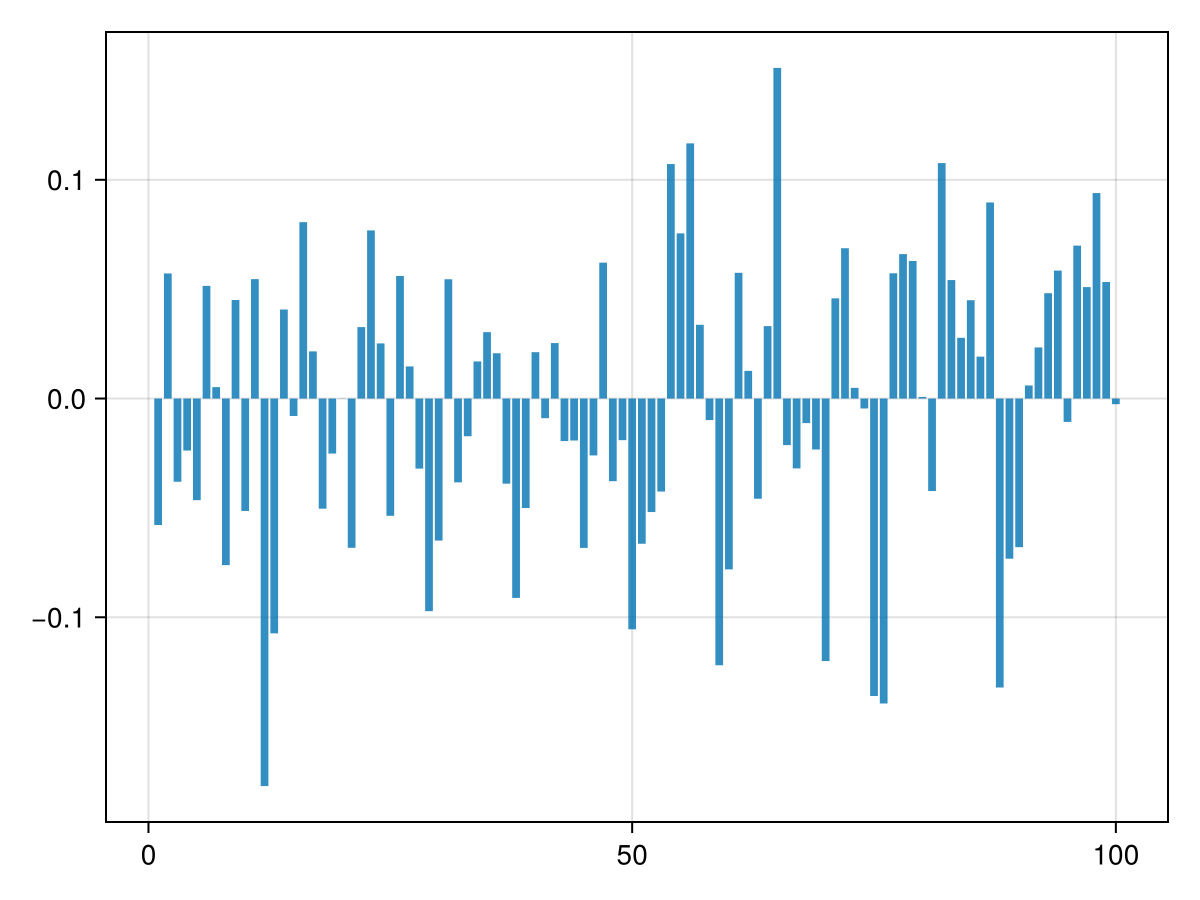

In [41]:
barplot(xx_sol)

In [42]:
problem1 = minimize(norm(xx,1),[A*xx == b])

Problem statistics
  problem is DCP         : true
  number of variables    : 1 (100 scalar elements)
  number of constraints  : 1 (20 scalar elements)
  number of coefficients : 2_020
  number of atoms        : 4

Solution summary
  termination status : OPTIMIZE_NOT_CALLED
  primal status      : NO_SOLUTION
  dual status        : NO_SOLUTION

Expression graph
  minimize
   └─ sum (convex; positive)
      └─ abs (convex; positive)
         └─ 100-element real variable (id: 123…065)
  subject to
   └─ == constraint (affine)
      └─ + (affine; real)
         ├─ * (affine; real)
         │  ├─ …
         │  └─ …
         └─ 20×1 Matrix{Float64}


In [43]:
solve!(problem1, SCS.Optimizer)

------------------------------------------------------------------
	       SCS v3.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 200, constraints m: 220
cones: 	  z: primal zero / dual free vars: 20
	  l: linear vars: 200
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
	  compiled with openmp parallelization enabled
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 2400, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 1.44e+01  1.00e+00  1.28e+03 -6.41e+02  1.00e-01  8.70e-04 
   250| 1.36e-02  3.96e-03  6.53e-04  3.36e+00  1.00

[ Info: [Convex.jl] Compilation finished: 0.0 seconds, 443.141 KiB of memory allocated


Problem statistics
  problem is DCP         : true
  number of variables    : 1 (100 scalar elements)
  number of constraints  : 1 (20 scalar elements)
  number of coefficients : 2_020
  number of atoms        : 4

Solution summary
  termination status : OPTIMAL
  primal status      : FEASIBLE_POINT
  dual status        : FEASIBLE_POINT
  objective value    : 3.3669

Expression graph
  minimize
   └─ sum (convex; positive)
      └─ abs (convex; positive)
         └─ 100-element real variable (id: 123…065)
  subject to
   └─ == constraint (affine)
      └─ + (affine; real)
         ├─ * (affine; real)
         │  ├─ …
         │  └─ …
         └─ 20×1 Matrix{Float64}


In [44]:
xx_sol1 = vec(evaluate(xx))

100-element Vector{Float64}:
  7.266790352188859e-5
  7.419982304317312e-5
  4.288045166625881e-5
  7.626720146647934e-7
 -7.7979478054634e-5
  0.00011584115169627608
 -9.172805318737151e-5
 -0.00017703574733987673
  0.00014435199966275262
  5.292736652156285e-5
 -9.826521189061976e-5
 -0.3247710343852267
 -0.036302936514145956
  ⋮
 -6.025937237038513e-5
 -0.0065690280772659395
 -3.945283241172757e-5
  0.00014627840327385627
 -0.00017327646122647882
  0.07410030842921149
 -0.00016007384894872157
  2.3871990249740736e-5
  9.021693714860366e-5
 -2.7279021368849826e-5
  4.405205452503745e-5
 -7.881035025386568e-5

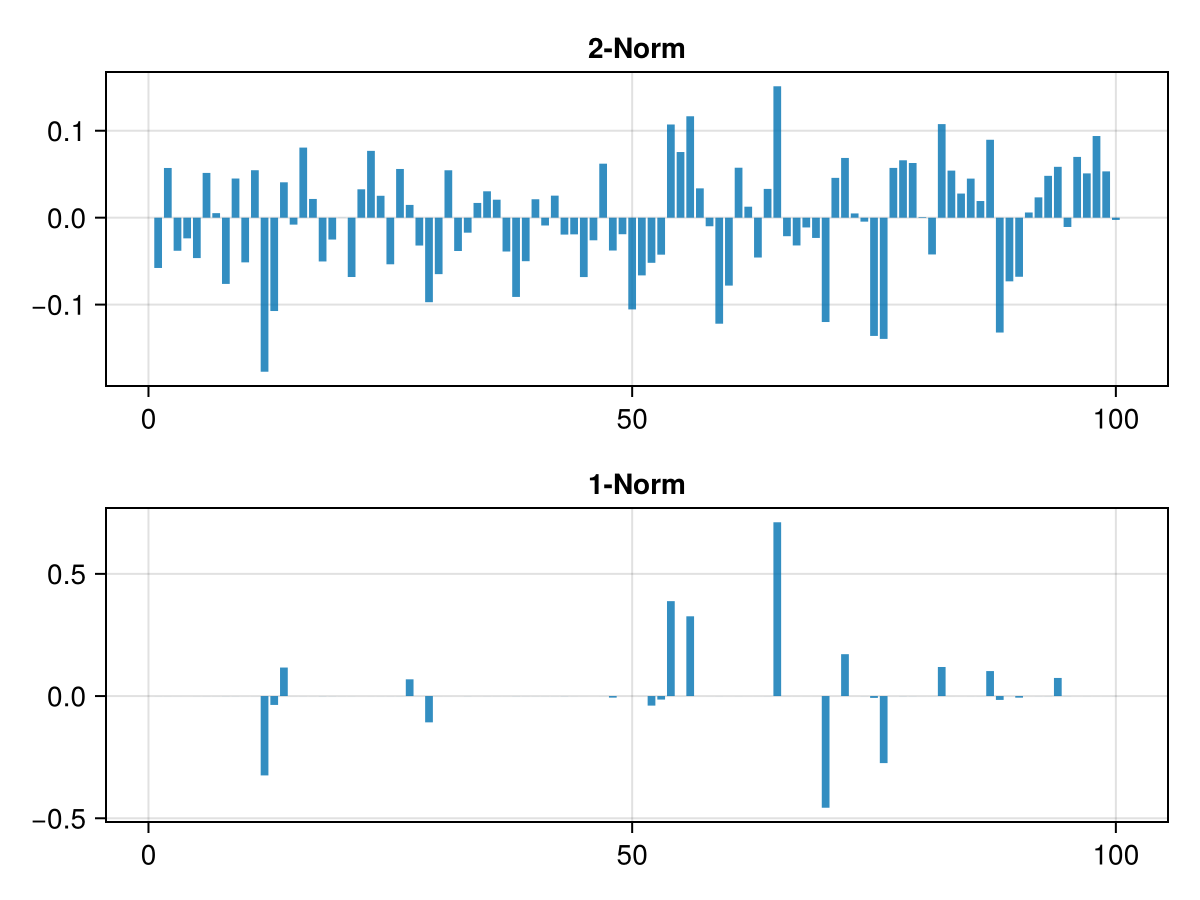

In [45]:
figbar_uc = Figure()
ax1 = Axis(figbar_uc[1,1], title="2-Norm")
barplot!(ax1,xx_sol)
ax2 = Axis(figbar_uc[2,1], title="1-Norm")
barplot!(ax2,xx_sol1)
figbar_uc

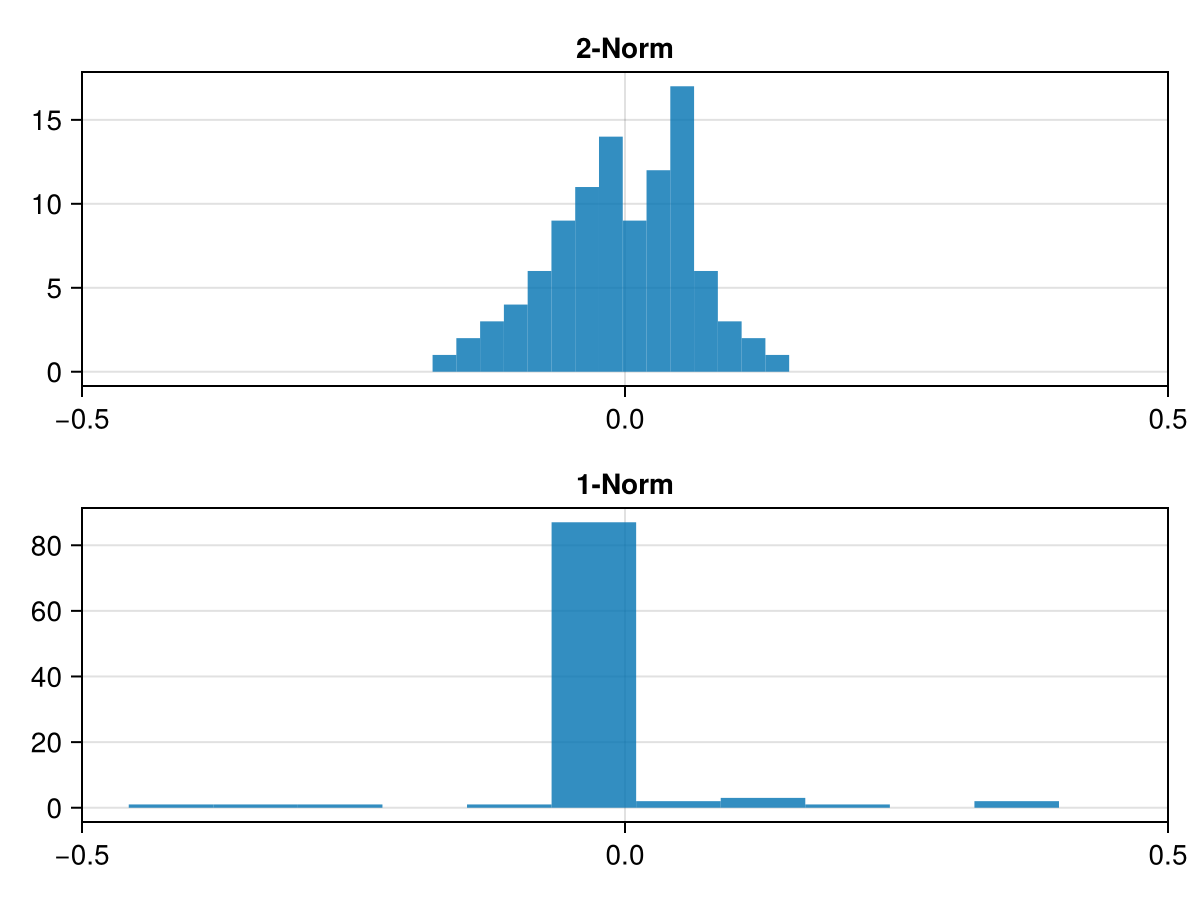

In [49]:
fighist_uc = Figure()
ax1 = Axis(fighist_uc[1,1], title="2-Norm")
hist!(ax1,xx_sol)
ax2 = Axis(fighist_uc[2,1], title="1-Norm")
hist!(ax2,xx_sol1)
xlims!.((ax1,ax2),-0.5,0.5)
fighist_uc

In [51]:
Pkg.status()

Status `~/Documents/programming/BME-574-2024/Project.toml`
  [13f3f980] CairoMakie v0.12.13
  [adc28fdd] CompressedSensing v1.0.1
  [f65535da] Convex v0.16.3
⌃ [717857b8] DSP v0.7.9
  [31c24e10] Distributions v0.25.112
  [7a1cc6ca] FFTW v1.8.0
  [f6369f11] ForwardDiff v0.10.36
  [10e44e05] MATLAB v0.8.4
  [429524aa] Optim v1.9.4
⌅ [7f7a1694] Optimization v3.26.3
⌅ [36348300] OptimizationOptimJL v0.3.2
⌅ [42dfb2eb] OptimizationOptimisers v0.2.1
⌃ [500b13db] OptimizationPolyalgorithms v0.2.1
⌃ [91a5bcdd] Plots v1.40.5
  [f27b6e38] Polynomials v4.0.11
  [c946c3f1] SCS v2.0.1
  [37e2e46d] LinearAlgebra
  [9a3f8284] Random
  [10745b16] Statistics v1.10.0
Info Packages marked with ⌃ and ⌅ have new versions available. Those with ⌃ may be upgradable, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`
